# Diabetes Classification

##### Objective 

1. We will use the cleaned data from Data Cleaning.ipynb to carry forward with SVM Analysis.
2. Column variables with high amounts of NaNs, and higher correlations with other column variables, will be dropped from the data frame. (e.g. age_level, insu, mass).
3. Two different kernels will be used (RBF & Polynomial). The results will be presented with and without min max scaling, as well as gridsearch optimization. Moreover the polynomial kernel will be ran in both 2nd and 3rd degree. 
4. Confusion matrix outputs will yield essential data on: accuracy, misclassification, true positive rate (recall), true negative rate, false positive rate, false negative rate, and precision.
5. After all results are collected one may deduce which model best classifies diabetic patients.

##### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


##### Data Cleaning 

In [2]:
data = pd.read_csv('diabetes_explore2.csv')

In [3]:
clean = data.copy(deep=True)

In [4]:
clean['plas'].replace(148,np.NAN,inplace=True)
clean.head()

clean['insu'].replace(0, np.NaN,inplace=True)
clean['insu'].replace(846, np.NaN,inplace=True)
clean['pres'].replace(0, np.NaN,inplace=True)
clean['skin'].replace(0, np.NaN,inplace=True)
clean['mass'].replace(0, np.NaN,inplace=True)
clean['plas'].replace(0, np.NaN,inplace=True)
clean['plas'].replace(199, np.NaN,inplace=True)

In [5]:
clean.isna().sum()

preg           0
plas          10
pres          35
skin         227
insu         375
mass          11
pedi           0
age            0
class          0
age_level      0
dtype: int64

In [6]:
clean.count()

preg         768
plas         758
pres         733
skin         541
insu         393
mass         757
pedi         768
age          768
class        768
age_level    768
dtype: int64

768 patients to observe

In [7]:
clean = clean.drop(['insu'], axis = 1)
clean = clean.drop(['skin'], axis = 1)
clean = clean.drop(['age_level'], axis = 1)
clean.head(20)
clean.isna().sum()

preg      0
plas     10
pres     35
mass     11
pedi      0
age       0
class     0
dtype: int64

Remove column variables insu and skin due to high amount of NaNs and association with mass and plasma. Impute remaining column variables with median value to fill NaNs that are do not exceed a count greater than 50. Given measures will only alter ~6.5% of the sample with native median values. 

### RBF Model Preparation

##### RBF Kernel Test Train Split

In [8]:
X = clean.drop('class', axis=1)
y = clean['class']

X_train_rbf, X_test_rbf, y_train_rbf, y_test_rbf = train_test_split(X, y, test_size = 0.30)

We construct the basis of the classifier test groups by separating class values through X and y variables.
train_test_split will use X and y to create train and test sets with a 70% training and 30% testing ratio

##### RBF Kernel Imputation

Given that there is a wide range of values the median will be prioritized for NaN replacement strategy over the mean.

In [9]:
X_train_rbf['plas'].fillna(X_train_rbf.plas.median(),inplace=True)
X_test_rbf['plas'].fillna(X_test_rbf.plas.median(),inplace=True)

X_train_rbf['pres'].fillna(X_train_rbf.plas.median(),inplace=True)
X_test_rbf['pres'].fillna(X_test_rbf.plas.median(),inplace=True)

X_train_rbf['mass'].fillna(X_train_rbf.plas.median(),inplace=True)
X_test_rbf['mass'].fillna(X_test_rbf.plas.median(),inplace=True)

/Users/patrickboada/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:6288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [10]:
X_train_rbf.isna().sum()
X_test_rbf.isna().sum()

y_test_rbf.isna().sum()
y_train_rbf.isna().sum()

0

In [11]:
X_train_rbf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 104 to 269
Data columns (total 6 columns):
preg    537 non-null int64
plas    537 non-null float64
pres    537 non-null float64
mass    537 non-null float64
pedi    537 non-null float64
age     537 non-null int64
dtypes: float64(4), int64(2)
memory usage: 29.4 KB


In [12]:
X_test_rbf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 598 to 351
Data columns (total 6 columns):
preg    231 non-null int64
plas    231 non-null float64
pres    231 non-null float64
mass    231 non-null float64
pedi    231 non-null float64
age     231 non-null int64
dtypes: float64(4), int64(2)
memory usage: 12.6 KB


Accept mixed datatype dataframe, converting all columnn variables to identical datatype  may cause loss of true values by truncating float64 values to int64 state.

##### RBF Kernel SVC

In [13]:
svc_rbf = SVC(kernel='rbf', gamma = 'scale', cache_size=10000, probability=True) 
print(svc_rbf)
clf_rbf = svc_rbf.fit(X_train_rbf,y_train_rbf)
y_pred_rbf = svc_rbf.predict(X_test_rbf)
pTot_rbf = accuracy_score(y_test_rbf, y_pred_rbf)
print("RBF Model Prediction accuracy: ", pTot_rbf)
print(confusion_matrix(y_test_rbf, y_pred_rbf))

SVC(C=1.0, cache_size=10000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
RBF Model Prediction accuracy:  0.7878787878787878
[[142  15]
 [ 34  40]]


The SVM ran a total of 231 predictions.

The model predicted 0 class (nondiabetic) 176 times. 
Of the 176 times it predicted nondiabetic it was correct 142 times, and incorrect 34 times. This implies that we have 142 true negatives and 34 false negatives.  

The model predicted 1 class (diabetic) 55 times.
Of the 55 times it predicted diabetic it was correct 40 times
and incorrect 15 times. This implies that we have 40 true positives and 15 false positives.

                 Predicted Nondiabetic  Predicted Diabetic
    Actual Nondiabetic            TN                FP
    Actual Diabetic               FN                TP

Accuracy:  79%,

Precision: 73%,

True Positive Rate: 54%,

True Negative Rate: 81%,

False Positive Rate: 10%,

Misclassification: 21%

##### Pickle RBF Kernel SVC

In [14]:
import pickle

outfile_rbf= open('model_rbf.pkl','wb')
pickle.dump(svc_rbf, outfile_rbf)
outfile_rbf.close()


infile_rbf = open('model_rbf.pkl', 'rb')
svc2_rbf = pickle.load(infile_rbf)
infile_rbf.close()


print (svc2_rbf)
y_pred_rbf = svc2_rbf.predict(X_test_rbf)
pTot_rbf = accuracy_score(y_test_rbf, y_pred_rbf)
print("RBF Prediction accuracy: ",pTot_rbf)
print(confusion_matrix(y_test_rbf, y_pred_rbf))


SVC(C=1.0, cache_size=10000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
RBF Prediction accuracy:  0.7878787878787878
[[142  15]
 [ 34  40]]


##### RBF Kernel SVC Confusion Matrix

In [15]:
cm_rbf = confusion_matrix(y_test_rbf, y_pred_rbf)
cm_rbf

array([[142,  15],
       [ 34,  40]])

##### RBF Kernel SVC Classification Report

In [16]:
report_rbf = classification_report(y_test_rbf, y_pred_rbf)
print (report_rbf)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       157
           1       0.73      0.54      0.62        74

    accuracy                           0.79       231
   macro avg       0.77      0.72      0.74       231
weighted avg       0.78      0.79      0.78       231



##### RBF Kernel SVC Data Min Max Scaling

In [17]:
print(X_test_rbf)
min_max_scaler = MinMaxScaler()
X_train_minmax_rbf = min_max_scaler.fit_transform(X_train_rbf)
X_test_minmax_rbf = min_max_scaler.transform(X_test_rbf)
X_test_minmax_rbf

     preg   plas   pres   mass   pedi  age
598     1  173.0   74.0   36.8  0.088   38
727     0  141.0   84.0   32.4  0.433   22
567     6   92.0   62.0   32.0  0.085   46
376     0   98.0   82.0   25.2  0.299   22
316     3   99.0   80.0   19.3  0.284   30
..    ...    ...    ...    ...    ...  ...
81      2   74.0  115.0  115.0  0.102   22
433     2  139.0   75.0   25.6  0.167   29
415     3  173.0   84.0   35.7  0.258   22
168     4  110.0   66.0   31.9  0.471   29
351     4  137.0   84.0   31.2  0.252   30

[231 rows x 6 columns]


array([[6.66666667e-02, 8.37662338e-01, 5.37634409e-01, 1.88259109e-01,
        1.71232877e-03, 2.83333333e-01],
       [0.00000000e+00, 6.29870130e-01, 6.45161290e-01, 1.43724696e-01,
        1.49400685e-01, 1.66666667e-02],
       [4.00000000e-01, 3.11688312e-01, 4.08602151e-01, 1.39676113e-01,
        4.28082192e-04, 4.16666667e-01],
       ...,
       [2.00000000e-01, 8.37662338e-01, 6.45161290e-01, 1.77125506e-01,
        7.44863014e-02, 1.66666667e-02],
       [2.66666667e-01, 4.28571429e-01, 4.51612903e-01, 1.38663968e-01,
        1.65667808e-01, 1.33333333e-01],
       [2.66666667e-01, 6.03896104e-01, 6.45161290e-01, 1.31578947e-01,
        7.19178082e-02, 1.50000000e-01]])

##### Min Max Scaled RBF Kernel SVC

In [18]:
svc_rbfMMS = SVC(C = 1.0, kernel='rbf', class_weight= 'balanced', cache_size=1000, gamma = 'scale', probability=True)
print(svc_rbfMMS)
clf_rbfMMS = svc_rbfMMS.fit(X_train_minmax_rbf, y_train_rbf) # trains the classifier on the training set
y_pred_minmax_rbf = svc_rbfMMS.predict(X_test_minmax_rbf) # tests the classifier on the test set
pTot_rbfMMS = accuracy_score(y_test_rbf, y_pred_minmax_rbf)
print ("Min Max Scaling RBF Prediction accuracy: ",pTot_rbfMMS)

SVC(C=1.0, cache_size=1000, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
Min Max Scaling RBF Prediction accuracy:  0.7445887445887446



##### Min Max Scaled RBF Kernel Confusion Matrix

In [19]:
cm_rbfMMS = confusion_matrix(y_test_rbf, y_pred_minmax_rbf)
print(cm_rbfMMS)
report_rbfMMS = classification_report(y_test_rbf, y_pred_minmax_rbf)
print (report_rbfMMS)

[[117  40]
 [ 19  55]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       157
           1       0.58      0.74      0.65        74

    accuracy                           0.74       231
   macro avg       0.72      0.74      0.72       231
weighted avg       0.77      0.74      0.75       231



##### Min Max Scaled RBF Kernel Classification Report 

The RBF kernel min max scaled SVM ran a total of 231 predictions.

The model predicted 0 class (nondiabetic) 136 times. 
Of the 136 times it predicted nondiabetic it was correct 117 times, and incorrect 19 times. This implies that we have 117 true negatives and 19 false negatives.  

The model predicted 1 class (diabetic) 95 times.
Of the 95 times it predicted diabetic it was correct 55 times
and incorrect 40 times. This implies that we have 55 true positives and 40 false positives.

                 Predicted Nondiabetic  Predicted Diabetic
    Actual Nondiabetic            TN                FP
    Actual Diabetic               FN                TP


Accuracy:  74%, 

Precision: 58%, 

True Positive Rate: 74%, 

True Negative Rate: 86%, 

False Positive Rate: 26%,

Misclassification: 26%, 


After min max scaling we see a 5% decrease in accuracy, 15% decrease in precision, 20% increase in TP rate, 5% increase in TN rate, 16% increase in FP rate, and 5% increase in misclassification.




##### Min Max Scaled RBF Kernel ROC Curve

In [20]:
probas_rbfMMS = svc_rbfMMS.fit(X_train_minmax_rbf, y_train_rbf).predict_proba(X_test_minmax_rbf)
fpr_rbfMMS, tpr_rbfMMS, thresholds_rbfMMS = roc_curve(y_test_rbf, probas_rbfMMS[:, 1])
roc_auc_rbfMMS = auc(fpr_rbfMMS, tpr_rbfMMS)
print ("thresholds", thresholds_rbfMMS)
print ("probas_", probas_rbfMMS)
print ("AUC using predict_proba", roc_auc_rbfMMS)

thresholds [1.83471121 0.83471121 0.81552835 0.78787686 0.78099384 0.74541664
 0.73670713 0.72833616 0.7273142  0.69732443 0.69389376 0.68564892
 0.67524952 0.6691208  0.66394664 0.65674839 0.65669778 0.64988355
 0.64934427 0.64776897 0.64333935 0.57118328 0.56828992 0.56015203
 0.55189945 0.53261369 0.50590836 0.48117404 0.45297514 0.4510998
 0.42944492 0.42406502 0.3807426  0.37217599 0.36621588 0.36453774
 0.35830856 0.35812722 0.35725499 0.3549384  0.35226082 0.34226326
 0.33511076 0.33462556 0.32815799 0.31156697 0.30435199 0.30202021
 0.29876    0.29251284 0.28392469 0.27775864 0.27636528 0.27070208
 0.24668507 0.24644844 0.19725276 0.19680538 0.19470115 0.1917377
 0.18331069 0.18105983 0.16985355 0.168577   0.10540531 0.10295751
 0.05408688 0.05388598 0.02695817]
probas_ [[0.26613608 0.73386392]
 [0.66877818 0.33122182]
 [0.88459458 0.11540542]
 [0.93443115 0.06556885]
 [0.94053232 0.05946768]
 [0.96227083 0.03772917]
 [0.55638542 0.44361458]
 [0.54960632 0.45039368]
 [0.4433862

AUC using predict_proba: 85%

In [21]:
%matplotlib inline

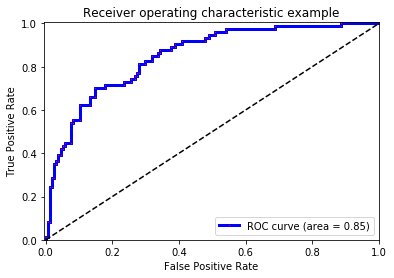

In [22]:
plt.figure()
plt.plot(fpr_rbfMMS, tpr_rbfMMS, label='ROC curve (area = %0.2f)' % roc_auc_rbfMMS, lw=3, color ="#0000ff", marker='s',markerfacecolor="red", markersize=2) 
plt.plot([0, 1], [0, 1], 'k--')

# Set x and y ranges, labels, title and legend
plt.xlim([-0.005, 1.0])  #x range basically from 0 to 1: start range a bit to left of min x value to see thick line better
plt.ylim([0.0, 1.005])   #0 range basically from 0 to 1: extend range a bit above max y value to see thick line better
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [23]:
C_range_rbfMMS = 10.0 ** np.arange(-2, 4)
gamma_range_rbfMMS = [.01, .1, 1, 'auto', 10, 100]
print (gamma_range_rbfMMS)
param_grid_rbfMMS = dict(gamma=gamma_range_rbfMMS, C=C_range_rbfMMS)
param_grid_rbfMMS

[0.01, 0.1, 1, 'auto', 10, 100]


{'gamma': [0.01, 0.1, 1, 'auto', 10, 100],
 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

##### Min Max Scaled RBF Kernel Grid Search Parameter Fine Tuning

In [24]:
grid_rbfMMS = GridSearchCV(SVC(kernel='rbf',cache_size=1000, probability=True), cv=3, param_grid=param_grid_rbfMMS) 
grid_rbfMMS.fit(X_train_minmax_rbf, y_train_rbf)
best_C = grid_rbfMMS.best_estimator_.C
best_gamma = grid_rbfMMS.best_estimator_.gamma
print ("The best C and gamma for rbf is: %.5f, %.5f " % (best_C, best_gamma))
grid_rbfMMS.best_estimator_

The best C and gamma for rbf is: 10.00000, 1.00000 


SVC(C=10.0, cache_size=1000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [25]:
best_predict_minmax_rbfMMS = grid_rbfMMS.best_estimator_.predict(X_test_minmax_rbf)
pTot_rbfMMS = accuracy_score(y_test_rbf, best_predict_minmax_rbfMMS)
print("Prediction accuracy: ",pTot_rbfMMS)
cm_rbfMMS = confusion_matrix(y_test_rbf, best_predict_minmax_rbfMMS)
print(cm_rbfMMS)
report_rbfMMS = classification_report(y_test_rbf, best_predict_minmax_rbfMMS)
print(report_rbfMMS)

Prediction accuracy:  0.8051948051948052
[[140  17]
 [ 28  46]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       157
           1       0.73      0.62      0.67        74

    accuracy                           0.81       231
   macro avg       0.78      0.76      0.77       231
weighted avg       0.80      0.81      0.80       231



##### Parameter Tuned Min Max Scaled RBF Kernel SVC 

In [26]:
test_svc = SVC(C=10, gamma=1,kernel='rbf', cache_size=1000, probability=True) 
clf_test = test_svc.fit(X_train_minmax_rbf, y_train_rbf)
y_pred_minmax_test = test_svc.predict(X_test_minmax_rbf) 
pTot = accuracy_score(y_test_rbf, y_pred_minmax_test)
print ("Prediction accuracy: ",pTot)

Prediction accuracy:  0.8051948051948052


using C = 1000 and gamma = 0.01 parameters as listed above from the gridsearch

In [27]:
cm_rbfMMS_Test = confusion_matrix(y_test_rbf, best_predict_minmax_rbfMMS)
print(cm_rbfMMS_Test)

[[140  17]
 [ 28  46]]


##### Parameter Tuned Min Max Scaled RBF Kernel Confusion Matrix

In [28]:
cm = confusion_matrix(y_test_rbf, y_pred_minmax_test)
print(cm)
report = classification_report(y_test_rbf, y_pred_minmax_test)
print (report) #for each class prints: precision  recall  f1-score   support

[[140  17]
 [ 28  46]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       157
           1       0.73      0.62      0.67        74

    accuracy                           0.81       231
   macro avg       0.78      0.76      0.77       231
weighted avg       0.80      0.81      0.80       231



##### Parameter Tuned Min Max Scaled RBF Kernel Classification Report 

The fine tuned, min max scaled, RBF kernel ran a total of 231 predictions.

The model predicted 0 class (nondiabetic) 168 times. 
Of the 168 times it predicted nondiabetic it was correct 140 times, and incorrect 28 times. This implies that we have 140 true negatives and 28 false negatives.  

The model predicted 1 class (diabetic) 63 times.
Of the 63 times it predicted diabetic it was correct 46 times
and incorrect 17 times. This implies that we have 46 true positives and 17 false positives.

                 Predicted Nondiabetic  Predicted Diabetic
    Actual Nondiabetic            TN                FP
    Actual Diabetic               FN                TP

Accuracy:  81%,

Precision:  73%,

True Positive Rate: 62%, 

True Negative Rate: 83%, 

False Positive Rate: 11%,

Misclassification: 20%,



Compared to the scaled rbf model: 

We see an 7% increase in accuracy, 15% increase in precision, 12% decrease in TP rate, 3% decrease in TN rate, 15% decrease in FP rate decreased and 6% decrease in misclassification. Overall there were decreases in TP TN FP rates and a desirable increase in precision.


##### Parameter Tuned Min Max Scaled RBF Kernel ROC Curve 

In [29]:
probas_ = test_svc.fit(X_train_minmax_rbf, y_train_rbf).predict_proba(X_test_minmax_rbf)
fpr, tpr, thresholds = roc_curve(y_test_rbf, probas_[:, 1])
roc_auc_rbfT = auc(fpr, tpr)
print ("AUC using predict_proba", roc_auc_rbfT)
probas_

AUC using predict_proba 0.8584954381132724


array([[0.18024893, 0.81975107],
       [0.65916122, 0.34083878],
       [0.89900958, 0.10099042],
       [0.91031824, 0.08968176],
       [0.92392636, 0.07607364],
       [0.94396458, 0.05603542],
       [0.52682366, 0.47317634],
       [0.61580792, 0.38419208],
       [0.53155494, 0.46844506],
       [0.87907648, 0.12092352],
       [0.64700687, 0.35299313],
       [0.39865552, 0.60134448],
       [0.9061548 , 0.0938452 ],
       [0.94385885, 0.05614115],
       [0.35436066, 0.64563934],
       [0.90870197, 0.09129803],
       [0.37316401, 0.62683599],
       [0.61750806, 0.38249194],
       [0.90732648, 0.09267352],
       [0.64305071, 0.35694929],
       [0.46258147, 0.53741853],
       [0.69009767, 0.30990233],
       [0.80718578, 0.19281422],
       [0.62894132, 0.37105868],
       [0.26005696, 0.73994304],
       [0.6284366 , 0.3715634 ],
       [0.83378183, 0.16621817],
       [0.24418771, 0.75581229],
       [0.230935  , 0.769065  ],
       [0.61986316, 0.38013684],
       [0.

AUC using predict_proba after min max scaling: 0.86%



### Second Degree Polynomial Kernel Model Preparation 

##### Second Degree Polynomial Kernel Test Train Split 

In [30]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X, y, test_size = 0.30)

##### Second Degree Polynomial Kernel Test Train Split 

In [31]:
X_train_poly['plas'].fillna(X_train_poly.plas.median(),inplace=True)
X_test_poly['plas'].fillna(X_test_poly.plas.median(),inplace=True)

X_train_poly['pres'].fillna(X_train_poly.plas.median(),inplace=True)
X_test_poly['pres'].fillna(X_test_poly.plas.median(),inplace=True)

X_train_poly['mass'].fillna(X_train_poly.plas.median(),inplace=True)
X_test_poly['mass'].fillna(X_test_poly.plas.median(),inplace=True)

/Users/patrickboada/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:6288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [32]:
y_test_poly.isna().sum()
y_train_poly.isna().sum()

X_train_poly.isna().sum()
X_test_poly.isna().sum()

preg    0
plas    0
pres    0
mass    0
pedi    0
age     0
dtype: int64

In [33]:
X_train_poly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 122 to 618
Data columns (total 6 columns):
preg    537 non-null int64
plas    537 non-null float64
pres    537 non-null float64
mass    537 non-null float64
pedi    537 non-null float64
age     537 non-null int64
dtypes: float64(4), int64(2)
memory usage: 29.4 KB


In [34]:
X_test_poly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 303 to 278
Data columns (total 6 columns):
preg    231 non-null int64
plas    231 non-null float64
pres    231 non-null float64
mass    231 non-null float64
pedi    231 non-null float64
age     231 non-null int64
dtypes: float64(4), int64(2)
memory usage: 12.6 KB


##### Second Degree Polynomial Kernel SVC

In [35]:
svc_poly = SVC(kernel='poly', degree = 2, cache_size=1000, gamma = 'scale', probability = False)  
print(svc_poly)
clf_poly = svc_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = svc_poly.predict(X_test_poly)
pTot_poly = accuracy_score(y_test_poly, y_pred_poly)
print(" Polynomial (2) Prediction accuracy: ", pTot_poly)
print(confusion_matrix(y_test_poly, y_pred_poly))

SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
 Polynomial (2) Prediction accuracy:  0.7619047619047619
[[133  18]
 [ 37  43]]



The SVM ran a total of 231 predictions.

The model predicted 0 class (nondiabetic) 170 times. 
Of the 170 times it predicted nondiabetic it was correct 133 times, and incorrect 37 times. This implies that we have 133 true negatives and 37 false negatives.  

The model predicted 1 class (diabetic) 61 times.
Of the 61 times it predicted diabetic it was correct 43 times
and incorrect 18 times. This implies that we have 43 true positives and 18 false positives.

                 Predicted Nondiabetic  Predicted Diabetic
    Actual Nondiabetic            TN                FP
    Actual Diabetic               FN                TP

Accuracy:  76%, 

Precision: 71%, 

True Positive Rate: 54%, 

True Negative Rate: 78%, 

False Positive Rate: 12%, 

Misclassification: 24%


##### Pickle Second Degree Polynomial Kernel SVC

In [36]:
import pickle

outfile_poly= open('model_poly2.pkl','wb')
pickle.dump(svc_poly, outfile_poly)
outfile_poly.close()

infile_poly = open('model_poly2.pkl', 'rb')
svc2_poly = pickle.load(infile_poly)
infile_poly.close()

print (svc2_poly)
y_pred_poly = svc2_poly.predict(X_test_poly)
pTot_poly = accuracy_score(y_test_poly, y_pred_poly)
print("Prediction accuracy: ",pTot_poly)
print(confusion_matrix(y_test_poly, y_pred_poly))




SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Prediction accuracy:  0.7619047619047619
[[133  18]
 [ 37  43]]


##### Second Degree Polynomial Kernel SVC Confusion Matrix

In [37]:
cm_poly = confusion_matrix(y_test_poly, y_pred_poly)
cm_poly

array([[133,  18],
       [ 37,  43]])

##### Second Degree Polynomial Kernel SVC Classification Repor 

In [38]:
report_poly = classification_report(y_test_poly, y_pred_poly)
print(report_poly)

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       151
           1       0.70      0.54      0.61        80

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



##### Second Degree Polynomial Kernel SVC Data Min Max Scaling

In [39]:
print(X_test_poly)
min_max_scaler_poly = MinMaxScaler()
X_train_minmax_poly = min_max_scaler_poly.fit_transform(X_train_poly)
X_test_minmax_poly = min_max_scaler_poly.transform(X_test_poly)
X_test_minmax_poly 

     preg   plas   pres  mass   pedi  age
303     5  115.0   98.0  52.9  0.209   28
473     7  136.0   90.0  29.9  0.210   50
259    11  155.0   76.0  33.3  1.353   51
392     1  131.0   64.0  23.7  0.389   21
257     2  114.0   68.0  28.7  0.092   25
..    ...    ...    ...   ...    ...  ...
169     3  111.0   90.0  28.4  0.495   29
498     7  195.0   70.0  25.1  0.163   55
194     8   85.0   55.0  24.4  0.136   42
691    13  158.0  114.0  42.3  0.257   44
278     5  114.0   74.0  24.9  0.744   57

[231 rows x 6 columns]


array([[0.29411765, 0.46405229, 0.75510204, 0.35121457, 0.05310493,
        0.11666667],
       [0.41176471, 0.60130719, 0.67346939, 0.11842105, 0.05353319,
        0.48333333],
       [0.64705882, 0.7254902 , 0.53061224, 0.15283401, 0.54304069,
        0.5       ],
       ...,
       [0.47058824, 0.26797386, 0.31632653, 0.06275304, 0.02184154,
        0.35      ],
       [0.76470588, 0.74509804, 0.91836735, 0.24392713, 0.07366167,
        0.38333333],
       [0.29411765, 0.45751634, 0.51020408, 0.06781377, 0.28222698,
        0.6       ]])

###### Min Max Scaled Second Degree Polynomial Kernel SVC

In [40]:
svc_polyMMS = SVC(kernel='poly', degree = 2, gamma = 'scale', class_weight='balanced', cache_size=1000, probability=True) 
print(svc_polyMMS) # calls SVC __str__ to view all the attibutes, including the default params you used 
clf_polyMMS = svc_polyMMS.fit(X_train_minmax_poly, y_train_poly) # trains the classifier on the training set
y_pred_minmax_poly = svc_polyMMS.predict(X_test_minmax_poly) # tests the classifier on the test set
pTot_polyMMS = accuracy_score(y_test_poly, y_pred_minmax_poly)
print("Prediction accuracy: ",pTot_polyMMS)

SVC(C=1.0, cache_size=1000, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
Prediction accuracy:  0.7965367965367965


###### Min Max Scaled Second Degree Polynomial Kernel Confusion Matrix

In [41]:
cm_polyMMS = confusion_matrix(y_test_poly, y_pred_minmax_poly)
print(cm_polyMMS)
report_polyMMS = classification_report(y_test_poly, y_pred_minmax_poly)
print(report_polyMMS)

[[122  29]
 [ 18  62]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       151
           1       0.68      0.78      0.73        80

    accuracy                           0.80       231
   macro avg       0.78      0.79      0.78       231
weighted avg       0.81      0.80      0.80       231



##### Min Max Scaled Second Degree Polynomial Kernel Classification Report 


The SVM ran a total of 231 predictions.

The model predicted 0 class (nondiabetic) 140 times. 
Of the 140 times it predicted nondiabetic it was correct 122 times, and incorrect 18 times. This implies that we have 122 true negatives and 18 false negatives.  

The model predicted 1 class (diabetic) 91 times.
Of the 91 times it predicted diabetic it was correct 62 times
and incorrect 29 times. This implies that we have 62 true positives and 29 false positives.

                 Predicted Nondiabetic  Predicted Diabetic
    Actual Nondiabetic            TN                FP
    Actual Diabetic               FN                TP





Accuracy:  80%, 

Precision: 68%, 

True Positive Rate: 78%, 

True Negative Rate: 87%, 

False Positive Rate: 19%, 

Misclassification: 20%

After min max scaling we can see a 4% increase in accuracy, 3% decrease in precision, 24% increase in TP rate, 9% increase in TN rate, 7% increase in FP rate, and 4% decrease in misclassification.

##### Min Max Scaled Second Degree Polynomial Kernel ROC Curve

In [42]:
probas_polyMMS = svc_polyMMS.fit(X_train_minmax_poly, y_train_poly).predict_proba(X_test_minmax_poly)
fpr_poly, tpr_poly, thresholds_poly = roc_curve(y_test_poly, probas_polyMMS[:, 1])
roc_auc_polyMMS = auc(fpr_poly, tpr_poly)
print ("thresholds", thresholds_poly)
print ("probas_", probas_polyMMS)
print ("AUC using predict_proba", roc_auc_polyMMS)

thresholds [1.99998687 0.99998687 0.98302888 0.9267284  0.91442683 0.83220642
 0.83063995 0.81609776 0.81360955 0.80465415 0.8009077  0.79065749
 0.78031149 0.76715812 0.75386235 0.72577748 0.71424648 0.67637063
 0.66218873 0.65802807 0.63744424 0.61873342 0.59983689 0.57823039
 0.57405177 0.54473512 0.53761897 0.53693485 0.5366442  0.53030984
 0.52266067 0.51203829 0.50737027 0.48674004 0.46836351 0.46615687
 0.45847198 0.42821811 0.42728875 0.41143089 0.40965997 0.40703985
 0.4004701  0.40001574 0.39879702 0.38299045 0.38217971 0.38199685
 0.38136909 0.37679334 0.37477678 0.36560815 0.31950822 0.31756477
 0.31026275 0.31018278 0.29893246 0.29395332 0.2629658  0.25994503
 0.25736619 0.25732188 0.23491047 0.23481663 0.22935824 0.2224125
 0.18499434 0.17828558 0.17248741 0.17203007 0.16729622 0.16595211
 0.16576352 0.16420221 0.14478042 0.14292382 0.12438162 0.1236735
 0.04304524]
probas_ [[6.23206659e-01 3.76793341e-01]
 [6.17820291e-01 3.82179709e-01]
 [4.92473200e-02 9.50752680e-01]


In [43]:
%matplotlib inline

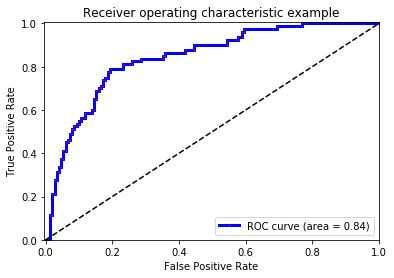

In [44]:
plt.figure()
#plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=4 ) # plot ROC curve, no marker
plt.plot(fpr_poly, tpr_poly, label='ROC curve (area = %0.2f)' % roc_auc_polyMMS, lw=3, color ="#0000ff", marker='s',markerfacecolor="red", markersize=2) 
plt.plot([0, 1], [0, 1], 'k--') # also plot black dashed line (k=black) from (0,0) to (1,1)

# Set x and y ranges, labels, title and legend
plt.xlim([-0.005, 1.0])  #x range basically from 0 to 1: start range a bit to left of min x value to see thick line better
plt.ylim([0.0, 1.005])   #0 range basically from 0 to 1: extend range a bit above max y value to see thick line better
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Area under curve improves with poly model

In [45]:
C_range_poly = 10.0 ** np.arange(-2, 4)
gamma_range_poly = [.01, .1, 1, 'auto', 10, 100]
print(gamma_range_poly)
param_grid_poly = dict(gamma=gamma_range_poly, C=C_range_poly)
param_grid_poly

[0.01, 0.1, 1, 'auto', 10, 100]


{'gamma': [0.01, 0.1, 1, 'auto', 10, 100],
 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

#####  Min Max Scaled Second Degree Polynomial Kernel Grid Search Parameter Fine Tuning  

In [46]:
grid_poly = GridSearchCV(SVC(kernel='poly', degree = 2, cache_size=1000, probability=False), param_grid=param_grid_poly, cv =3)  
grid_poly.fit(X_train_minmax_poly, y_train_poly)
best_C_poly = grid_poly.best_estimator_.C
best_gamma_poly = grid_poly.best_estimator_.gamma
print("The best C and gamma for the second degree polynomial is: %.5f, %.5f " % (best_C_poly, best_gamma_poly))
grid_poly.best_estimator_

The best C and gamma for the second degree polynomial is: 0.10000, 10.00000 


SVC(C=0.1, cache_size=1000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=10, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

The best C and gamma for the second degree polynomial kernel is: 0.1000, 10.00000

In [47]:
best_predict_minmax_poly = grid_poly.best_estimator_.predict(X_test_minmax_poly)
pTot_poly = accuracy_score(y_test_poly, best_predict_minmax_poly)
print("Prediction accuracy: ",pTot_poly)
cmp_poly = confusion_matrix(y_test_poly, best_predict_minmax_poly)
print(cmp_poly)
report_poly = classification_report(y_test_poly, best_predict_minmax_poly)
print(report_poly) #for each class prints: precision  recall  f1-score   support

Prediction accuracy:  0.7835497835497836
[[134  17]
 [ 33  47]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       151
           1       0.73      0.59      0.65        80

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



##### Parameter Tuned Min Max Scaled Second Degree Polynomial Kernel SVC

In [48]:
test_svc_poly = SVC(C=0.1, gamma=10,kernel='poly', degree = 2, cache_size=1000, probability=True) 
clf_test_poly = test_svc_poly.fit(X_train_minmax_poly, y_train_poly)
y_pred_minmax_test_poly = test_svc_poly.predict(X_test_minmax_poly) 
pTot_poly = accuracy_score(y_test_poly, y_pred_minmax_test_poly)
print ("Prediction accuracy: ",pTot_poly)

Prediction accuracy:  0.7835497835497836


#####  Parameter Tuned Min Max Scaled Second Degree Polynomial Kernel Confusion Matrix

In [49]:
cm_poly = confusion_matrix(y_test_poly, y_pred_minmax_test_poly)
print(cm_poly)
report_poly = classification_report(y_test_poly, y_pred_minmax_test_poly)
print (report_poly)

[[134  17]
 [ 33  47]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       151
           1       0.73      0.59      0.65        80

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



##### Parameter Tuned Min Max Scaled Second Degree Polynomial Kernel Classification Report 

The SVM ran a total of 231 predictions.

The model predicted 0 class (nondiabetic) 167 times. 
Of the 167 times it predicted nondiabetic it was correct 134 times, and incorrect 33 times. This implies that we have 134 true negatives and 33 false negatives.  

The model predicted 1 class (diabetic) 64 times.
Of the 64 times it predicted diabetic it was correct 47 times
and incorrect 17 times. This implies that we have 47 true positives and 17 false positives.

                 Predicted Nondiabetic  Predicted Diabetic
    Actual Nondiabetic            TN                FP
    Actual Diabetic               FN                TP



Accuracy:  78%,

Precision: 73%, 

True Positive Rate: 59%,

True Negative Rate: 80%,

False Positive Rate: 11%, 

Misclassification: 22%

After fine tuning parameters we see a 2% decrease in accuracy, 5% increase in precision, 19% decrease in TP rate, 7% decrease in TN rate, 8% decrease in FP rate, and 2% increase in misclassification.

##### Parameter Tuned Min Max Scaled Second Degree Polynomial Kernel ROC Curve

In [50]:
probas_poly = test_svc_poly.fit(X_train_minmax_poly, y_train_poly).predict_proba(X_test_minmax_poly)
fpr_poly, tpr_poly, thresholds = roc_curve(y_test_poly, probas_poly[:, 1])
roc_auc_poly = auc(fpr_poly, tpr_poly)
print ("AUC using predict_proba", roc_auc_poly)
probas_poly

AUC using predict_proba 0.8415562913907285


array([[0.62604184, 0.37395816],
       [0.67977329, 0.32022671],
       [0.03493265, 0.96506735],
       [0.81218869, 0.18781131],
       [0.83330988, 0.16669012],
       [0.64196399, 0.35803601],
       [0.30684138, 0.69315862],
       [0.80110849, 0.19889151],
       [0.76826956, 0.23173044],
       [0.90677756, 0.09322244],
       [0.34107444, 0.65892556],
       [0.8278614 , 0.1721386 ],
       [0.84796797, 0.15203203],
       [0.78982903, 0.21017097],
       [0.10706454, 0.89293546],
       [0.88707034, 0.11292966],
       [0.88131703, 0.11868297],
       [0.15103162, 0.84896838],
       [0.91783287, 0.08216713],
       [0.86781179, 0.13218821],
       [0.9094661 , 0.0905339 ],
       [0.80528315, 0.19471685],
       [0.45183488, 0.54816512],
       [0.90459051, 0.09540949],
       [0.84287083, 0.15712917],
       [0.91152392, 0.08847608],
       [0.5       , 0.5       ],
       [0.79249446, 0.20750554],
       [0.83450993, 0.16549007],
       [0.92620673, 0.07379327],
       [0.

### Third Degree Polynomial Kernel Model Preparation

##### Third Degree Polynomial Kernel Test Train Split

In [51]:
X_train_poly3, X_test_poly3, y_train_poly3, y_test_poly3 = train_test_split(X, y, test_size = 0.30)

##### Third Degree Polynomial Kernel Imputation

In [52]:
X_train_poly3['plas'].fillna(X_train_poly3.plas.median(),inplace=True)
X_test_poly3['plas'].fillna(X_test_poly3.plas.median(),inplace=True)

X_train_poly3['pres'].fillna(X_train_poly3.plas.median(),inplace=True)
X_test_poly3['pres'].fillna(X_test_poly3.plas.median(),inplace=True)

X_train_poly3['mass'].fillna(X_train_poly3.plas.median(),inplace=True)
X_test_poly3['mass'].fillna(X_test_poly3.plas.median(),inplace=True)

/Users/patrickboada/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:6288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [53]:
y_test_poly3.isna().sum()
y_train_poly3.isna().sum()

X_train_poly3.isna().sum()
X_test_poly3.isna().sum()

preg    0
plas    0
pres    0
mass    0
pedi    0
age     0
dtype: int64

In [54]:
X_train_poly3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 248 to 433
Data columns (total 6 columns):
preg    537 non-null int64
plas    537 non-null float64
pres    537 non-null float64
mass    537 non-null float64
pedi    537 non-null float64
age     537 non-null int64
dtypes: float64(4), int64(2)
memory usage: 29.4 KB


In [55]:
X_test_poly3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 596 to 47
Data columns (total 6 columns):
preg    231 non-null int64
plas    231 non-null float64
pres    231 non-null float64
mass    231 non-null float64
pedi    231 non-null float64
age     231 non-null int64
dtypes: float64(4), int64(2)
memory usage: 12.6 KB


##### Third Degree Polynomial Kernel SVC  

In [56]:
svc_poly3 = SVC(kernel='poly', degree = 3,  cache_size=1000, gamma = 'scale', probability = True)  
print(svc_poly3)
clf_poly3 = svc_poly3.fit(X_train_poly3, y_train_poly3)
y_pred_poly3 = svc_poly3.predict(X_test_poly3)
pTot_poly3 = accuracy_score(y_test_poly3, y_pred_poly3)
print(" Polynomial (3) Prediction accuracy: ", pTot_poly3)
print(confusion_matrix(y_test_poly3, y_pred_poly3))

SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
 Polynomial (3) Prediction accuracy:  0.7705627705627706
[[132  15]
 [ 38  46]]


##### Pickle Third Degree Polynomial SVM 

In [71]:
import pickle

outfile_poly3= open('model_poly3.pkl','wb')
pickle.dump(svc_poly3, outfile_poly3)
outfile_poly3.close()


infile_poly3 = open('model_poly3.pkl', 'rb')
svc2_poly3 = pickle.load(infile_poly3)
infile_poly3.close()


print (svc2_poly3)
y_pred_poly3 = svc2_poly3.predict(X_test_poly3)
pTot_poly3 = accuracy_score(y_test_poly3, y_pred_poly3)
print("Prediction accuracy: ",pTot_poly3)
print(confusion_matrix(y_test_poly3, y_pred_poly3))

SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
Prediction accuracy:  0.7705627705627706
[[132  15]
 [ 38  46]]


##### Third Degree Polynomial Kernel SVC Confusion Matrix

In [58]:
cm_poly3 = confusion_matrix(y_test_poly3, y_pred_poly3)
cm_poly3

array([[132,  15],
       [ 38,  46]])

##### Third Degree Polynomial Kernel SVC Classification Report

In [59]:
report_poly3 = classification_report(y_test_poly3, y_pred_poly3)
print(report_poly3)

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       147
           1       0.75      0.55      0.63        84

    accuracy                           0.77       231
   macro avg       0.77      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



The SVM ran a total of 231 predictions.

The model predicted 0 class (nondiabetic) 170 times. 
Of the 170 times it predicted nondiabetic it was correct 132 times, and incorrect 38 times. This implies that we have 132 true negatives and 38 false negatives.  

The model predicted 1 class (diabetic) 61 times.
Of the 61 times it predicted diabetic it was correct 46 times
and incorrect 15 times. This implies that we have 46 true positives and 15 false positives.

                 Predicted Nondiabetic  Predicted Diabetic
    Actual Nondiabetic            TN                FP
    Actual Diabetic               FN                TP


Accuracy:  77%,

Precision: 75%, 

True Positive Rate: 55%,

True Negative Rate: 78%, 

False Positive Rate: 10%,

Misclassification: 23%

##### Third Degree Polynomial Kernel SVC Data Min Max Scaling

In [60]:
print(X_test_poly3)
min_max_scaler_poly3 = MinMaxScaler()
X_train_minmax_poly3 = min_max_scaler_poly3.fit_transform(X_train_poly3)
X_test_minmax_poly3 = min_max_scaler_poly3.transform(X_test_poly3)
X_test_minmax_poly3

     preg   plas   pres  mass   pedi  age
596     0   67.0   76.0  45.3  0.194   46
365     5   99.0   54.0  34.0  0.499   30
477     7  114.0   76.0  23.8  0.466   31
530     2  122.0   60.0  29.8  0.717   22
362     5  103.0  108.0  39.2  0.305   65
..    ...    ...    ...   ...    ...  ...
475     0  137.0   84.0  27.3  0.231   59
399     3  193.0   70.0  34.9  0.241   25
317     3  182.0   74.0  30.5  0.345   29
521     3  124.0   80.0  33.2  0.305   26
47      2   71.0   70.0  28.0  0.586   22

[231 rows x 6 columns]


array([[0.        , 0.14935065, 0.5       , 0.2742915 , 0.04953032,
        0.51020408],
       [0.35714286, 0.35714286, 0.26086957, 0.15991903, 0.17976089,
        0.18367347],
       [0.5       , 0.45454545, 0.5       , 0.05668016, 0.16567037,
        0.20408163],
       ...,
       [0.21428571, 0.8961039 , 0.47826087, 0.12449393, 0.11400512,
        0.16326531],
       [0.21428571, 0.51948052, 0.54347826, 0.15182186, 0.0969257 ,
        0.10204082],
       [0.14285714, 0.17532468, 0.43478261, 0.09919028, 0.21690863,
        0.02040816]])

##### Min Max Scaled Third Degree Polynomial Kernel SVC 

In [61]:
svc_poly3MMS = SVC(kernel='poly', degree = 3, gamma = 'scale', class_weight='balanced', cache_size=1000, probability=True) 
print(svc_poly3MMS)
clf_poly3MMS = svc_poly3MMS.fit(X_train_minmax_poly3, y_train_poly3)
y_pred_minmax_poly3 = svc_poly3MMS.predict(X_test_minmax_poly3) 
pTot_poly3MMS = accuracy_score(y_test_poly3, y_pred_minmax_poly3)
print("Prediction accuracy: ",pTot_poly3MMS)

SVC(C=1.0, cache_size=1000, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
Prediction accuracy:  0.7575757575757576


##### Min Max Scaled Third Degree Polynomial Kernel Confusion Matrix 

In [62]:
cm_poly3MMS = confusion_matrix(y_test_poly3, y_pred_minmax_poly3)
print(cm_poly3MMS)
report_poly3MMS = classification_report(y_test_poly3, y_pred_minmax_poly3)
print(report_poly3MMS)

[[120  27]
 [ 29  55]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       147
           1       0.67      0.65      0.66        84

    accuracy                           0.76       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



##### Min Max Scaled Third Degree Polynomial Kernel Classification Report

The SVM ran a total of 231 predictions.

The model predicted 0 class (nondiabetic) 149 times. 
Of the 149 times it predicted nondiabetic it was correct 120 times, and incorrect 29 times. This implies that we have 120 true negatives and 29 false negatives.  

The model predicted 1 class (diabetic) 82 times.
Of the 82 times it predicted diabetic it was correct 55 times
and incorrect 27 times. This implies that we have 55 true positives and 27 false positives.

                 Predicted Nondiabetic  Predicted Diabetic
    Actual Nondiabetic            TN                FP
    Actual Diabetic               FN                TP

Accuracy:  76%, 

Precision: 67%, 

True Positive Rate: 66%, 

True Negative Rate: 81%, 

False Positive Rate: 18%, 

Misclassification: 24%

After min max scaling, we see 1% decrease in accuracy, 8% decrease in precision, 11% increase in TP rate, 3% increase in TN rate, 8% increase in FP rate and 1% increase in misclassification.

##### Min Max Scaled Third Degree Polynomial Kernel ROC Curve 

In [63]:
probas_poly3MMS = svc_poly3MMS.fit(X_train_minmax_poly3, y_train_poly3).predict_proba(X_test_minmax_poly3)
fpr_poly3, tpr_poly3, thresholds_poly3 = roc_curve(y_test_poly3, probas_poly3MMS[:, 1])
roc_auc_poly3MMS = auc(fpr_poly3, tpr_poly3)
print ("thresholds", thresholds_poly3)
print ("probas_", probas_poly3MMS)
print ("AUC using predict_proba", roc_auc_poly3MMS)

thresholds [1.99998204 0.99998204 0.99275879 0.97063061 0.96995446 0.93111253
 0.92718867 0.67804987 0.66464224 0.60031968 0.54736936 0.54639999
 0.54506631 0.53720273 0.53172774 0.52797032 0.5        0.4925753
 0.48663628 0.4839177  0.4738785  0.45535617 0.44266671 0.4185001
 0.41260616 0.39968564 0.39663072 0.39437375 0.37367305 0.36293813
 0.3559997  0.34743209 0.34118708 0.33696111 0.3301222  0.31913528
 0.3151759  0.31213082 0.30635685 0.30352807 0.29409785 0.29402153
 0.2939154  0.29174357 0.28884884 0.28799754 0.27769695 0.27473166
 0.2696255  0.26878622 0.25408336 0.25209995 0.25009875 0.24998026
 0.24107705 0.23908188 0.23565258 0.23201041 0.22686404 0.22589165
 0.22494388 0.2220357  0.21609621 0.2155696  0.21394309 0.21344329
 0.20770651 0.20768834 0.19490802 0.19431474 0.17509656 0.17368384
 0.14603497 0.13739087 0.10954984 0.10095972 0.02417349]
probas_ [[8.82724298e-01 1.17275702e-01]
 [7.37117670e-01 2.62882330e-01]
 [7.45534246e-01 2.54465754e-01]
 [7.81447974e-01 2.1855

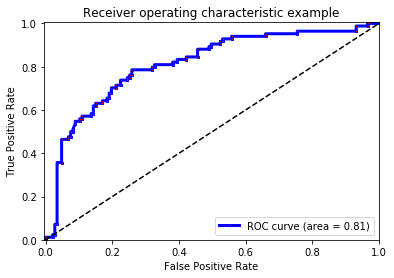

In [64]:
plt.figure()
plt.plot(fpr_poly3, tpr_poly3, label='ROC curve (area = %0.2f)' % roc_auc_poly3MMS, lw=3, color ="#0000ff", marker='s',markerfacecolor="red", markersize=2) 
plt.plot([0, 1], [0, 1], 'k--') # also plot black dashed line (k=black) from (0,0) to (1,1)
# Set x and y ranges, labels, title and legend
plt.xlim([-0.005, 1.0])  #x range basically from 0 to 1: start range a bit to left of min x value to see thick line better
plt.ylim([0.0, 1.005])   #0 range basically from 0 to 1: extend range a bit above max y value to see thick line better
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [65]:
C_range_poly3 = 10.0 ** np.arange(-2, 4)
gamma_range_poly3 = [.01, .1, 1, 'auto', 10, 100]
print(gamma_range_poly3)
param_grid_poly3 = dict(gamma=gamma_range_poly3, C=C_range_poly3)
param_grid_poly3

[0.01, 0.1, 1, 'auto', 10, 100]


{'gamma': [0.01, 0.1, 1, 'auto', 10, 100],
 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

##### Min Max Scaled Third Degree Polynomial Kernel Grid Search Parameter Fine Tuning

In [66]:
grid_poly3 = GridSearchCV(SVC(kernel='poly', degree = 3, cache_size=1000, probability=False), param_grid=param_grid_poly3, cv =3)  
grid_poly3.fit(X_train_minmax_poly3, y_train_poly3)
best_C_poly3 = grid_poly3.best_estimator_.C
best_gamma_poly3 = grid_poly3.best_estimator_.gamma
print((best_C_poly3, best_gamma_poly3))
grid_poly3.best_estimator_

(100.0, 'auto')


SVC(C=100.0, cache_size=1000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

The third degree polynomial grid search may take hours to process. Remove numeric truncation in case auto is rendered.

C=100.0, gamma = auto

In [67]:
best_predict_minmax_poly3 = grid_poly3.best_estimator_.predict(X_test_minmax_poly3)
pTot_poly3 = accuracy_score(y_test_poly3, best_predict_minmax_poly3)
print("Prediction accuracy: ",pTot_poly3)
cmp_poly3 = confusion_matrix(y_test_poly3, best_predict_minmax_poly3)
print(cmp_poly3)
report_poly3 = classification_report(y_test_poly3, best_predict_minmax_poly3)
print(report_poly3)

Prediction accuracy:  0.7792207792207793
[[135  12]
 [ 39  45]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       147
           1       0.79      0.54      0.64        84

    accuracy                           0.78       231
   macro avg       0.78      0.73      0.74       231
weighted avg       0.78      0.78      0.77       231



##### Parameter Tuned Min Max Scaled Third Degree Polynomial Kernel SVC

In [68]:
test_svc_poly3 = SVC(C=100, gamma='auto',kernel='poly', degree = 3, cache_size=1000, probability=True) 
clf_test_poly3 = test_svc_poly3.fit(X_train_minmax_poly3, y_train_poly3) # trains the classifier on the training set
y_pred_minmax_test_poly3 = test_svc_poly3.predict(X_test_minmax_poly3) # tests the classifier on the test set
pTot_poly3 = accuracy_score(y_test_poly3, y_pred_minmax_test_poly3)
print ("Prediction accuracy: ",pTot_poly3)

Prediction accuracy:  0.7792207792207793


##### Parameter Tuned Min Max Scaled Third Degree Polynomial Kernel Confusion Matrix 

In [69]:
cm_poly3 = confusion_matrix(y_test_poly3, y_pred_minmax_test_poly3)
print(cm_poly3)
report_poly3 = classification_report(y_test_poly3, y_pred_minmax_test_poly3)
print (report_poly3)

[[135  12]
 [ 39  45]]
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       147
           1       0.79      0.54      0.64        84

    accuracy                           0.78       231
   macro avg       0.78      0.73      0.74       231
weighted avg       0.78      0.78      0.77       231



##### Parameter Tuned Min Max Scaled Third Degree Polynomial Kernel Classification Report

The SVM ran a total of 231 predictions.

The model predicted 0 class (nondiabetic) 174 times. 
Of the 174 times it predicted nondiabetic it was correct 135 times, and incorrect 39 times. This implies that we have 135 true negatives and 39 false negatives.  

The model predicted 1 class (diabetic) 57 times.
Of the 57 times it predicted diabetic it was correct 45 times
and incorrect 12 times. This implies that we have 45 true positives and 12 false positives.

                 Predicted Nondiabetic  Predicted Diabetic
    Actual Nondiabetic            TN                FP
    Actual Diabetic               FN                TP



Accuracy:  78%,

Precision: 79%, 

True Positive Rate: 54%,

True Negative Rate: 78%, 

False Positive Rate: 8%, 

Misclassification: 22%


After adjusting,  we can see 2% increase in accuracy, 12%  increase in precision, 12% decrease in TP rate, 3% decrease in TN rate, 10% decrease in FP rate, and 2% decrease in misclassification.

Precision and Accuracy increased however TP & TN rates decreased

##### Parameter Tuned Min Max Scaled Third Degree Polynomial Kernel ROC Curve

In [70]:
probas_poly3 = test_svc_poly3.fit(X_train_minmax_poly3, y_train_poly3).predict_proba(X_test_minmax_poly3)
fpr_poly3, tpr_poly3, thresholds_poly3 = roc_curve(y_test_poly3, probas_poly3[:, 1])  # use the probs of (smoke), not of nonsmoking
roc_auc_poly3 = auc(fpr_poly3, tpr_poly3)
print ("AUC using predict_proba", roc_auc_poly3)
probas_poly3

AUC using predict_proba 0.8334548104956269


array([[0.88188901, 0.11811099],
       [0.80213176, 0.19786824],
       [0.74057667, 0.25942333],
       [0.78866213, 0.21133787],
       [0.84646005, 0.15353995],
       [0.18657153, 0.81342847],
       [0.50551287, 0.49448713],
       [0.79089128, 0.20910872],
       [0.10301068, 0.89698932],
       [0.78771157, 0.21228843],
       [0.86037676, 0.13962324],
       [0.74608839, 0.25391161],
       [0.73822283, 0.26177717],
       [0.63026971, 0.36973029],
       [0.8661576 , 0.1338424 ],
       [0.77272532, 0.22727468],
       [0.77213203, 0.22786797],
       [0.81201312, 0.18798688],
       [0.8646849 , 0.1353151 ],
       [0.62163027, 0.37836973],
       [0.81953638, 0.18046362],
       [0.83024173, 0.16975827],
       [0.56280216, 0.43719784],
       [0.76453697, 0.23546303],
       [0.07282338, 0.92717662],
       [0.88605247, 0.11394753],
       [0.74798164, 0.25201836],
       [0.59281272, 0.40718728],
       [0.7895357 , 0.2104643 ],
       [0.85511294, 0.14488706],
       [0.

##### Analysis and Model Selection 

Of all tested models, the highest precision and accuracy came from the fine tuned min max scaled 3rd degree polynomial kernel. It held an accuracy of 78%, precision of 79%, and an AUC of 83%. 

##### Summary of SVM results 

<b>Simple RBF:</b>

Accuracy:  79%,

Precision: 73%,

True Positive Rate: 54%,

True Negative Rate: 81%,

False Positive Rate: 10%,

Misclassification: 21%


<b>Min Max Scaled RBF</b>

Accuracy:  74%, 

Precision: 58%, 

True Positive Rate: 74%, 

True Negative Rate: 86%, 

False Positive Rate: 26%,

Misclassification: 26%, 
AUC: 85%

<b>Parameter Tuned Min Max Scaled RBF</b>

Accuracy:  81%,

Precision:  73%,

True Positive Rate: 62%, 

True Negative Rate: 83%, 

False Positive Rate: 11%,

Misclassification: 20%,
AUC: 86%



<b>Simple Second Degree Polynomial:</b>

Accuracy:  76%, 

Precision: 71%, 

True Positive Rate: 54%,

True Negative Rate: 78%, 

False Positive Rate: 12%, 

Misclassification: 24%




<b>Min Max Scaled Second Degree Polynomial:</b>

Accuracy:  80%, 

Precision: 68%, 

True Positive Rate: 78%, 

True Negative Rate: 87%, 

False Positive Rate: 19%, 

Misclassification: 20%
AUC: 84%

<b>Parameter Tuned Min Max Scaled Second Degree Polynomial:</b>

Accuracy:  78%,

Precision: 73%, 

True Positive Rate: 59%,

True Negative Rate: 80%,

False Positive Rate: 11%, 

Misclassification: 22%

AUC: 84%


<b>Simple Third Degree Polynomial:</b>

Accuracy:  77%, 

Precision: 75%, 

True Positive Rate: 55%, 

True Negative Rate: 78%, 

False Positive Rate: 10%, 

Misclassification: 23%


<b>Min Max Scaled Third Degree Polynomial:</b>

Accuracy:  76%, 

Precision: 67%, 

True Positive Rate: 66%, 

True Negative Rate: 81%, 

False Positive Rate: 18%, 

Misclassification: 24%

AUC: 81%

<b>Parameter Tuned Min Max Scaled Third Degree Polynomial:</b>

Accuracy:  78%, 

Precision: 79%, 

True Positive Rate: 54%, 

True Negative Rate: 78%, 

False Positive Rate: 8%, 

Misclassification: 22%

AUC: 83%
 

